<a href="https://colab.research.google.com/github/Vrush-cmd/APTCODERASSIGNMENT/blob/main/Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('music.csv')

In [3]:
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
df.tail()

,age,gender,genre
13,27,0,Acoustic
14,30,0,Acoustic
15,31,0,Classical
16,34,0,Classical
17,35,0,Classical


In [6]:
import matplotlib.pyplot as plt

In [29]:
X = df[['age','gender']]
y =df[['genre']]

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.drop('genre',axis=1)
Y=le.fit_transform(df['genre'])

In [9]:
le.classes_

array(['Acoustic', 'Classical', 'Dance', 'HipHop', 'Jazz'], dtype=object)

In [11]:
le.inverse_transform([0,1,2,3,4])

array(['Acoustic', 'Classical', 'Dance', 'HipHop', 'Jazz'], dtype=object)

In [12]:
dict(zip(le.inverse_transform([0,1,2,3,4]),[0,1,2,3,4]))

{'Acoustic': 0, 'Classical': 1, 'Dance': 2, 'HipHop': 3, 'Jazz': 4}

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.25,random_state = 56)

In [24]:
import seaborn as sns
def draw_confusion_matrix(cm):
    plt.figure(figsize=(2,2))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=56)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)


1.0
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


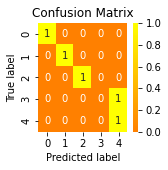

In [25]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train.values, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

1.0
0.6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


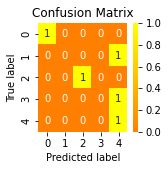

In [28]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

In [34]:
predictions = rf.predict([
     [20,1], [20,0]
])
print(predictions)

[3 2]


Here 3 means HipHop and 2 means Dance

In [35]:
predictions = rf.predict([
     [29,1], [29,0]
])
print(predictions)

[4 0]


4 is JAZZ and 0 is Acoustic